In [ ]:
# Installing tensorflow
!pip install tensorflow

In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Importing the data
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
'''
Age: The age of the customer.
Job: The occupation of the customer.
Marital Status: The marital status of the customer.
Education: The education level of the customer.
Default: Whether or not the customer has credit in default.
Balance: The balance of the customer's account.
Housing Loan: Whether or not the customer has a housing loan.
Contact Communication Type: The method used to contact the customer (e.g., telephone, cellular).
Day: The day of the month when the last contact with the customers was made.
Duration: The duration (in seconds) of the current visit.
Campaign Contacts Count: Number of contacts performed during this campaign for each customer
-pdays : number days passed since previously contacted form previous camapign
-poutcome : outcome from previous marketing campaign
'''

In [ ]:
# Dropping the 'duration' column
df.drop('duration', axis = 1, inplace = True)

In [ ]:
# Getting an idea about the proportion of values in the target variable
df['deposit'].value_counts()

,count
deposit,
no,5873
yes,5289


In [ ]:
# We have almost equal amount of data from class 0 and 1

In [ ]:
# Encode the target variable
df['deposit'] = df['deposit'].map({'yes' : 1, 'no' : 0})

In [ ]:
# Seperating input features and target variable
X = df.drop('deposit', axis = 1)
y = df['deposit']

In [ ]:
# Encode the categorical columns using pd.get_dummies()
categorical_cols = X.select_dtypes(include = ['object']).columns
X = pd.get_dummies(X, columns = categorical_cols, drop_first = True)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 5)

In [ ]:
# Build the Deep Learning Model
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Compiling the model
model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [ ]:
'''
Compiling the model -> setting the strategy for learning
(1) loss function -> This given an idea about the error in the model
(2) optimizer -> controls how the model learns by
adjusting the weights during backward propogation
(3) metrics -> what should be reported diuring the training phase
'''

In [ ]:
# Training the model
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5041 - loss: 0.7232 - val_accuracy: 0.6148 - val_loss: 0.6583
Epoch 2/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6180 - loss: 0.6541 - val_accuracy: 0.6461 - val_loss: 0.6305
Epoch 3/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6584 - loss: 0.6195 - val_accuracy: 0.6607 - val_loss: 0.6182
Epoch 4/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6808 - loss: 0.6012 - val_accuracy: 0.6719 - val_loss: 0.6115
Epoch 5/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6885 - loss: 0.5888 - val_accuracy: 0.6753 - val_loss: 0.6078
Epoch 6/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7017 - loss: 0.5717 - val_accuracy: 0.6764 - val_loss: 0.6051
Epoch 7/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7074 - loss: 0.5761 - val_accuracy: 0.6786 - val_loss: 0.6034
Epoch 8/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7059 - loss: 0.5714 - val_accuracy: 0.

In [ ]:
'''
Training Accuracy -> 74.76%
Validation Accuracy -> 70.10%

Training and Validation performance are within 5% of each other.
Also, both the performance values are above 70%
'''

In [ ]:
# Evaluate the model on testing dataset
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7190 - loss: 0.5555
Test Loss: 0.5666
Test Accuracy: 0.7152


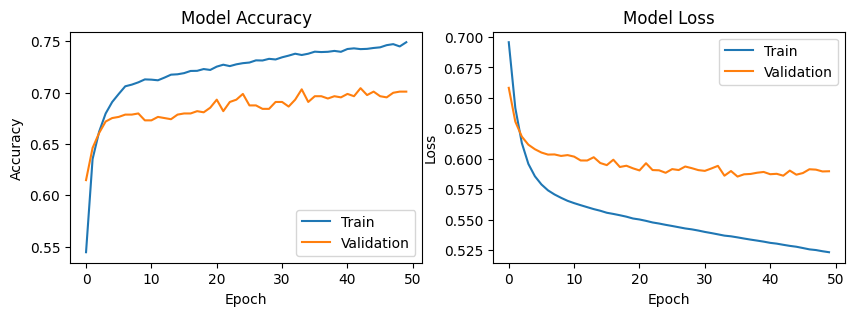

In [ ]:
# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy Plot
plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()